In [11]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

In [12]:
domain_mapping = {418:'ksta', 1677:'tagesspiegel', 35774:'sport1', 694:'gulli', }

In [19]:
results = pd.read_csv('test_results_3_no_unknown_users', delimiter=',', header=None, names=['ranker', 'day', 'domain','correct','total', 'precision'])
domains = results['domain']
domains = domains.unique()
domains = domains.tolist()
domains.remove(3336)
domains.remove(2522)
domains.remove(596)
domains.remove(13554)

rankers = results['ranker']
rankers = rankers.unique()

In [20]:
domains

[418, 35774, 694, 1677]

In [21]:
results.query('ranker == "contentrank" & domain == 35774')

,ranker,day,domain,correct,total,precision
4,contentrank,1,35774,3931,40333,0.097464
12,contentrank,2,35774,3900,34859,0.111879
20,contentrank,3,35774,4971,29332,0.169474
28,contentrank,4,35774,4466,34083,0.131033
36,contentrank,5,35774,2973,36706,0.080995
44,contentrank,6,35774,2241,42105,0.053224
52,contentrank,7,35774,576,41333,0.013936
60,contentrank,8,35774,1180,40609,0.029058
68,contentrank,9,35774,561,34996,0.016030
76,contentrank,10,35774,733,34307,0.021366


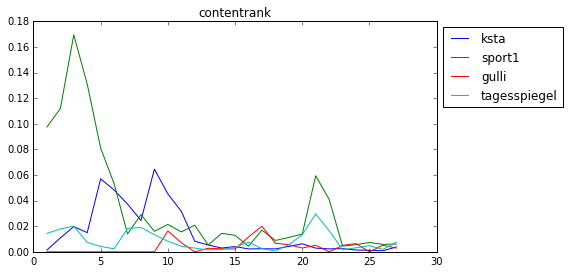

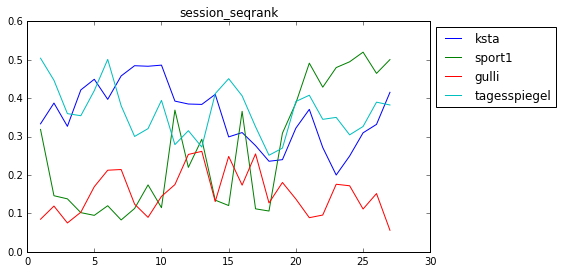

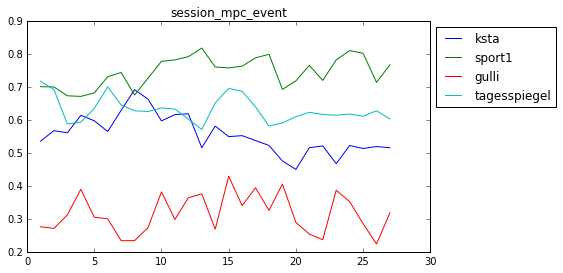

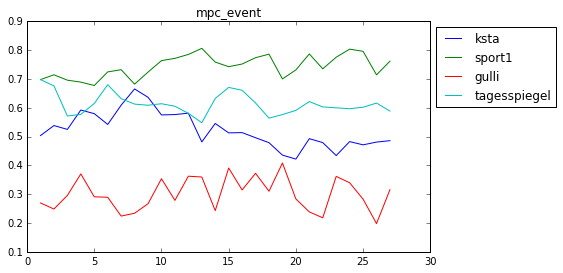

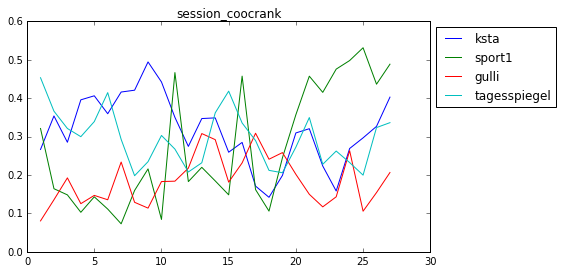

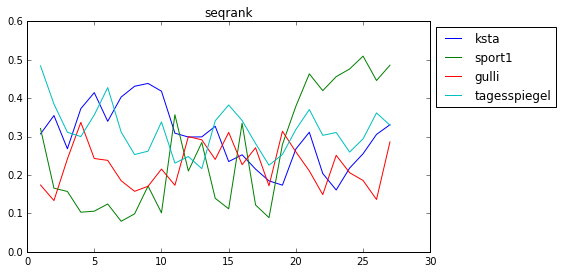

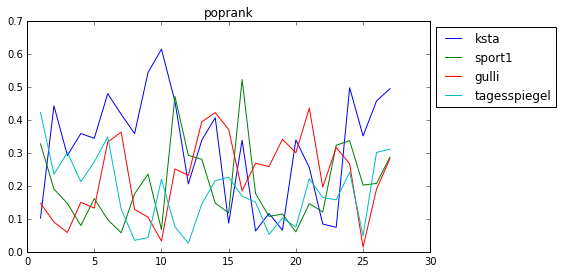

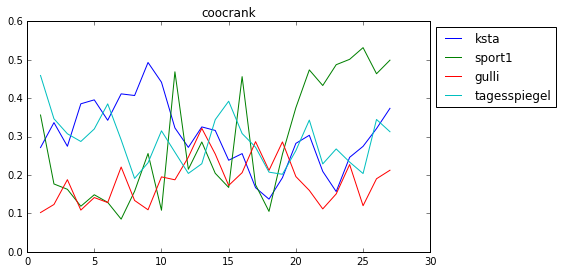

In [22]:
i = 0
for ranker in rankers:
    i = i +1
    fig = plt.figure(figsize=(8,4))
    ax  = fig.add_subplot(111)
    ax.set_title(ranker)
#     plt.title(ranker)
    for domain in domains:
        if domain in ['13554', '596', '2522']:
            pass
        subresults = results.query('ranker == "%s" & domain == %s' % (ranker,domain))
        days = subresults['day']
        precision = subresults['precision']
        ax.set_position([0.1,0.1,0.7,0.8])
        ax.plot(days, precision)
        ax.legend([domain_mapping[x] for x in domains], loc="upper left", bbox_to_anchor=(1,1))
#         fig.savefig('ranker_%s_test1.png' % ranker)


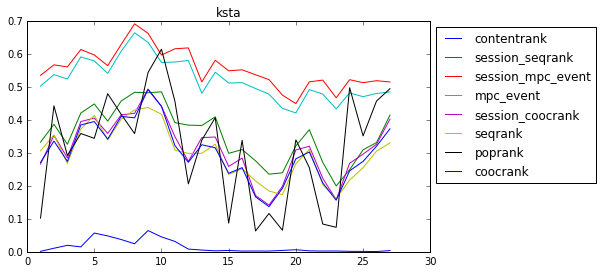

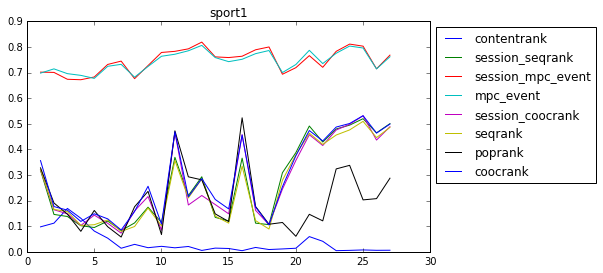

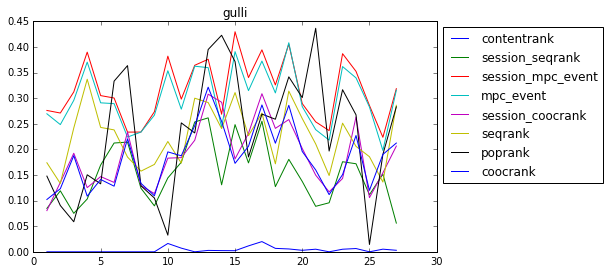

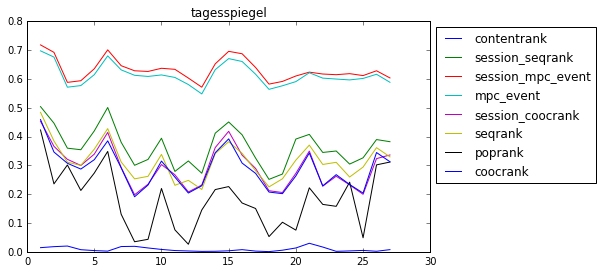

In [23]:
i=0
for domain in domains:
    i = i + 1
    fig = plt.figure(figsize=(8,4))
    ax  = fig.add_subplot(111)
    ax.set_title(domain_mapping[domain])
    for ranker in rankers:
        subresults = results.query('ranker == "%s" & domain == %s' % (ranker,domain))
        days = subresults['day']
        precision = subresults['precision']
        ax.set_position([0.1,0.1,0.7,0.8])
        ax.plot(days, precision)
        ax.legend(rankers, loc="upper left", bbox_to_anchor=(1,1))
#         fig.savefig('domain_%s_test1.png' % domain)